In [2]:
import data_loader
import numpy as np
import keras
import pickle
import cv2
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from time import time as runtime
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import random

Using TensorFlow backend.


### Load the original data

In [3]:
img_dir_path = 'origin/images'
label_file_path = 'origin/data/legend.csv'
valid_rate = 0.1

train_file_paths, \
y_train, \
valid_file_paths, \
y_valid, \
test_file_paths, \
y_test, \
label_dict = data_loader.load_dataset(img_dir_path, label_file_path, valid_rate)

print('train_images size is: ', len(train_file_paths))
print('valid_images size is: ', len(valid_file_paths))
print('test_images size is: ', len(test_file_paths))
print('label_dict size is: ', len(label_dict))
print(label_dict.keys())

print('y_train:', y_train.shape)
print('y_valid:', y_valid.shape)

train_images size is:  11086
valid_images size is:  1226
test_images size is:  1378
label_dict size is:  8
dict_keys(['anger', 'disgust', 'happiness', 'contempt', 'sadness', 'fear', 'surprise', 'neutral'])
y_train: (11086,)
y_valid: (1226,)


### Load the extracted features by CNN

In [5]:
with open("extract/x_train_norm", "rb") as f:
    x_train = np.array(pickle.load(f))

with open("extract/x_valid_norm", "rb") as f:
    x_valid = np.array(pickle.load(f))

with open("extract/x_test_norm", "rb") as f:
    x_test = np.array(pickle.load(f))

print("x_train is", x_train.shape)
print("x_valid is", x_valid.shape)
print("x_test is", x_test.shape)

x_train is (11086, 512)
x_valid is (1226, 512)
x_test is (1378, 512)


### implement random Forest

In [8]:
train_rate_all = []
valid_rate_all = []
test_rate_all = []
estimator_number = [25, 50, 75, 100, 125, 150, 175, 200]
depth = [10, 12, 14, 16, 18, 20, 22, 24]
# process the training data
for num in estimator_number:
    train_rate = []
    valid_rate = []
    test_rate = []
    for d in depth:
        clf = RandomForestClassifier(n_estimators=num, max_depth=d,random_state=0)
        clf.fit(x_train, y_train)
        # training data predict
        Xtr_pre = clf.predict(x_train)
        # validation data predict
        Xva_pre = clf.predict(x_valid)
        # test data predict
        xte_pre = clf.predict(x_test)

        # training data rate
        train_count = 0;
        for i in range(len(y_train)):
            if y_train[i] == Xtr_pre[i]:
                train_count += 1
        train_rate.append(train_count/len(x_train))
        print('training accuracy (tree number:',num,', depth:',d,'):',train_count/len(x_train))

        # validation data rate
        validation_count = 0;
        for i in range(len(y_valid)):
            if y_valid[i] == Xva_pre[i]:
                validation_count += 1
        valid_rate.append(validation_count/len(x_valid))
        print('validation accuracy (tree number:',num,',depth:',d,'):',validation_count/len(x_valid))

        # test data rate
        test_count = 0;
        for i in range(len(y_test)):
            if y_test[i] == xte_pre[i]:
                test_count += 1
        test_rate.append(test_count/len(x_test))
        print('test accuracy (tree number:',num,',depth:',d,'):',test_count/len(x_test))
    train_rate_all.append(train_rate)
    valid_rate_all.append(valid_rate)
    test_rate_all.append(test_rate)

training accuracy (tree number: 25 , depth: 10 ): 0.7813458416020206
validation accuracy (tree number: 25 ,depth: 10 ): 0.499184339314845
test accuracy (tree number: 25 ,depth: 10 ): 0.4898403483309144
training accuracy (tree number: 25 , depth: 12 ): 0.8630705394190872
validation accuracy (tree number: 25 ,depth: 12 ): 0.4934747145187602
test accuracy (tree number: 25 ,depth: 12 ): 0.4869375907111756
training accuracy (tree number: 25 , depth: 14 ): 0.9082626736424319
validation accuracy (tree number: 25 ,depth: 14 ): 0.5024469820554649
test accuracy (tree number: 25 ,depth: 14 ): 0.5087082728592163
training accuracy (tree number: 25 , depth: 16 ): 0.9511997113476457
validation accuracy (tree number: 25 ,depth: 16 ): 0.50163132137031
test accuracy (tree number: 25 ,depth: 16 ): 0.4985486211901306
training accuracy (tree number: 25 , depth: 18 ): 0.9784412772866679
validation accuracy (tree number: 25 ,depth: 18 ): 0.4722675367047308
test accuracy (tree number: 25 ,depth: 18 ): 0.48113

training accuracy (tree number: 150 , depth: 12 ): 0.9151181670575501
validation accuracy (tree number: 150 ,depth: 12 ): 0.5032626427406199
test accuracy (tree number: 150 ,depth: 12 ): 0.5
training accuracy (tree number: 150 , depth: 14 ): 0.9244993685729749
validation accuracy (tree number: 150 ,depth: 14 ): 0.5097879282218597
test accuracy (tree number: 150 ,depth: 14 ): 0.5174165457184325
training accuracy (tree number: 150 , depth: 16 ): 0.9570629622947863
validation accuracy (tree number: 150 ,depth: 16 ): 0.5163132137030995
test accuracy (tree number: 150 ,depth: 16 ): 0.5043541364296081
training accuracy (tree number: 150 , depth: 18 ): 0.9952191953815623
validation accuracy (tree number: 150 ,depth: 18 ): 0.5048939641109299
test accuracy (tree number: 150 ,depth: 18 ): 0.4862119013062409
training accuracy (tree number: 150 , depth: 20 ): 0.9992783691141981
validation accuracy (tree number: 150 ,depth: 20 ): 0.5089722675367048
test accuracy (tree number: 150 ,depth: 20 ): 0.49

### Plot the accuracy in color bar

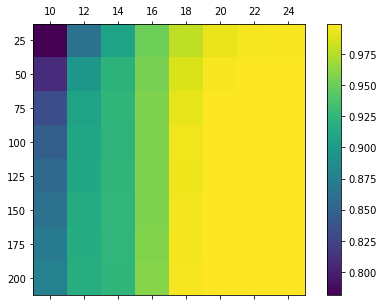

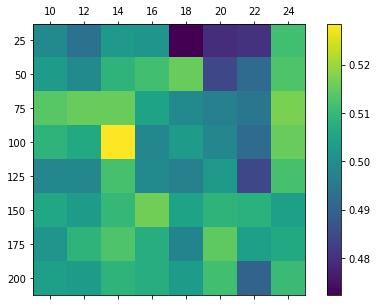

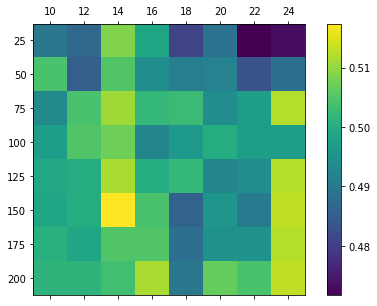

In [9]:
# plot train error
f, ax = plt.subplots(1, 1, figsize=(8, 5))
cax = ax.matshow(train_rate_all, interpolation='nearest')
f.colorbar(cax)
ax.set_xticklabels(['']+depth) 
ax.set_yticklabels(['']+estimator_number)
plt.show()

# plot validation error
f, ax = plt.subplots(1, 1, figsize=(8, 5))
cax = ax.matshow(valid_rate_all, interpolation='nearest')
f.colorbar(cax)
ax.set_xticklabels(['']+depth) 
ax.set_yticklabels(['']+estimator_number)
plt.show()

# plot test error
f, ax = plt.subplots(1, 1, figsize=(8, 5))
cax = ax.matshow(test_rate_all, interpolation='nearest')
f.colorbar(cax)
ax.set_xticklabels(['']+depth) 
ax.set_yticklabels(['']+estimator_number)
plt.show()

### Using different max_features to explore
- If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).
- If “log2”, then max_features=log2(n_features).
- If None, then max_features=n_features.

### Parameter configuration
Through training based on the above analysis, we found that the we got best performance when depth is 14 and and we traverse the estimator numbers and the max_features to find a better value for max_features setting.

In [10]:
train_rate_all = []
valid_rate_all = []
test_rate_all = []
estimator_number = [25, 50, 75, 100, 125, 150, 175, 200]
max_features = ['sqrt','log2', None]
# process the training data
for num in estimator_number:
    train_rate = []
    valid_rate = []
    test_rate = []
    for max_feature in max_features:
        clf = RandomForestClassifier(n_estimators=num, max_depth = 14,max_features = max_feature, random_state=0)
        clf.fit(x_train, y_train)
        
        # training data predict
        Xtr_pre = clf.predict(x_train)
        # validation data predict
        Xva_pre = clf.predict(x_valid)
        # test data predict
        xte_pre = clf.predict(x_test)
        
        # training data rate
        train_count = 0;
        for i in range(len(y_train)):
            if y_train[i] == Xtr_pre[i]:
                train_count += 1
        train_rate.append(train_count/len(x_train))
        print('training accuracy (tree number:',num,', max_feature:',max_feature,'):',train_count/len(x_train))

        # validation data rate
        validation_count = 0;
        for i in range(len(y_valid)):
            if y_valid[i] == Xva_pre[i]:
                validation_count += 1
        valid_rate.append(validation_count/len(x_valid))
        print('validation accuracy (tree number:',num,',max_feature:',max_feature,'):',validation_count/len(x_valid))

        # test data rate
        test_count = 0;
        for i in range(len(y_test)):
            if y_test[i] == xte_pre[i]:
                test_count += 1
        test_rate.append(test_count/len(x_test))
        print('test accuracy (tree number:',num,',max_feature:',max_feature,'):',test_count/len(x_test))
    train_rate_all.append(train_rate)
    valid_rate_all.append(valid_rate)
    test_rate_all.append(test_rate)

training accuracy (tree number: 25 , max_feature: sqrt ): 0.9161104095255277
validation accuracy (tree number: 25 ,max_feature: sqrt ): 0.49755301794453505
test accuracy (tree number: 25 ,max_feature: sqrt ): 0.45500725689404936
training accuracy (tree number: 25 , max_feature: log2 ): 0.9084430813638824
validation accuracy (tree number: 25 ,max_feature: log2 ): 0.48694942903752036
test accuracy (tree number: 25 ,max_feature: log2 ): 0.49782293178519593
training accuracy (tree number: 25 , max_feature: None ): 0.9414576943893198
validation accuracy (tree number: 25 ,max_feature: None ): 0.5048939641109299
test accuracy (tree number: 25 ,max_feature: None ): 0.488388969521045
training accuracy (tree number: 50 , max_feature: sqrt ): 0.9251307955980516
validation accuracy (tree number: 50 ,max_feature: sqrt ): 0.5032626427406199
test accuracy (tree number: 50 ,max_feature: sqrt ): 0.47677793904209
training accuracy (tree number: 50 , max_feature: log2 ): 0.9214324373083168
validation acc

In [13]:
import numpy as np
import matplotlib.pyplot as plt
x = [25, 50, 75, 100, 125, 150, 175, 200]

# print the training error varied by max_features
train_sqrt = []
train_log2 = []
train_None = []
for i in range(8):
    for j in range(3):
        if(j == 0):
            train_sqrt.append(train_rate_all[i][j])
        if (j == 1):
            train_log2.append(train_rate_all[i][j])
        if (j == 2):
            train_None.append(train_rate_all[i][j])

plt.figure(figsize=(8,4))
plt.plot(x,train_sqrt,label='$train sqrt$',color='red')
plt.plot(x,train_log2,label='$train log2$',color='blue')
plt.plot(x,train_None,label='$train None$',color='green')
plt.xlabel('Number of Trees')
plt.ylabel('traing data accuracy')
plt.title('Training accuracy with different max_features')
plt.legend()
plt.grid(True)
plt.show()

# print the training error varied by max_features
validation_sqrt = []
validation_log2 = []
validation_None = []
for i in range(8):
    for j in range(3):
        if(j % 3 == 0):
            validation_sqrt.append(valid_rate_all[i][j])
        if (j % 3 == 1):
            validation_log2.append(valid_rate_all[i][j])
        if (j % 3 == 2):
            validation_None.append(valid_rate_all[i][j])

plt.figure(figsize=(8,4))
plt.plot(x,validation_sqrt,label='$validation sqrt$',color='red')
plt.plot(x,validation_log2,label='$validation log2$',color='blue')
plt.plot(x,validation_None,label='$validation None$',color='green')
plt.xlabel('Number of Trees')
plt.ylabel('validation data accuracy')
plt.title('Validation accuracy with different max_features')
plt.legend()
plt.grid(True)
plt.show()

# print the test error varied by max_features
test_sqrt = []
test_log2 = []
test_None = []
for i in range(8):
    for j in range(3):
        if(j % 3 == 0):
            test_sqrt.append(test_rate_all[i][j])
        if (j % 3 == 1):
            test_log2.append(test_rate_all[i][j])
        if (j % 3 == 2):
            test_None.append(test_rate_all[i][j])

plt.figure(figsize=(8,4))
plt.plot(x,test_sqrt,label='$test sqrt$',color='red')
plt.plot(x,test_log2,label='$test log2$',color='blue')
plt.plot(x,test_None,label='$test None$',color='green')
plt.xlabel('Number of Trees')
plt.ylabel('test data accuracy')
plt.title('Test accuracy with different max_features')
plt.legend()
plt.grid(True)
plt.show()

print(test_sqrt)
print(test_log2)
print(test_None)

NameError: name 'train_rate_all' is not defined

In [15]:
# test for random forest parameters
clf = RandomForestClassifier(n_estimators=150,max_depth =14, max_features = 'log2', random_state=0)

# RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
#             max_depth=None, max_features='auto', max_leaf_nodes=None,
#             min_samples_leaf=1, min_samples_split=2,
#             min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
#             oob_score=False, random_state=None, verbose=0,
#             warm_start=False)

clf.fit(x_train, y_train)
count0 = 0
count1 = 0
count2 = 0
count3 = 0
count4 = 0
count5 = 0
count6 = 0
count7 = 0
        
Xtr_pre = clf.predict(x_train)
Xva_pre = clf.predict(x_test)

train_count = 0

for i in range(len(x_train)):
    if y_train[i] == Xtr_pre[i]:
        train_count += 1

print(train_count/len(x_train))

validation_count = 0

for i in range(len(y_valid)):       
    if (Xva_pre[i] == 0):
        count0 += 1
    if (Xva_pre[i] == 1):
        count1 += 1
    if (Xva_pre[i] == 2):
        count2 += 1
    if (Xva_pre[i] == 3):
        count3 += 1
    if (Xva_pre[i] == 4):
        count4 += 1
    if (Xva_pre[i] == 5):
        count5 += 1
    if (Xva_pre[i] == 6):
        count6 += 1
    if (Xva_pre[i] == 7):
        count7 += 1
        
    if y_test[i] == Xva_pre[i]:
        validation_count += 1
print('test accuracy',validation_count/len(x_test))

print(count0)
print(count1)
print(count2)
print(count3)
print(count4)
print(count5)
print(count6)
print(count7)


0.9212520295868664
test accuracy 0.47750362844702465
0
0
70
0
0
0
0
1156


In [113]:
# TEST for the distribution of the dataset
count0 = 0
count1 = 0
count2 = 0
count3 = 0
count4 = 0
count5 = 0
count6 = 0
count7 = 0
for i in range(len(y_train)):
    if (y_train[i] == 0):
        count0 += 1
    if (y_train[i] == 1):
        count1 += 1
    if (y_train[i] == 2):
        count2 += 1
    if (y_train[i] == 3):
        count3 += 1
    if (y_train[i] == 4):
        count4 += 1
    if (y_train[i] == 5):
        count5 += 1
    if (y_train[i] == 6):
        count6 += 1
    if (y_train[i] == 7):
        count7 += 1

print(count0)
print(count1)
print(count2)
print(count3)
print(count4)
print(count5)
print(count6)
print(count7)
        

0
5565
4617
206
299
11
170
218


In [31]:
model_dt = DecisionTreeClassifier(max_depth = 3)
model_dt = model_dt.fit(x_train, y_train)


count0 = 0
count1 = 0
count2 = 0
count3 = 0
count4 = 0
count5 = 0
count6 = 0
count7 = 0
        
Xtr_pre = model_dt.predict(x_train)
Xva_pre = model_dt.predict(x_valid)

train_count = 0

for i in range(len(x_train)):
    if y_train[i] == Xtr_pre[i]:
        train_count += 1

print('training accuracy',train_count/len(x_train))

validation_count = 0

count = [0, 0, 0, 0, 0, 0, 0, 0]
for i in range(len(y_valid)):
    count[y_train[i]] += 1
    if (Xva_pre[i] == 0):
        count0 += 1
    if (Xva_pre[i] == 1):
        count1 += 1
    if (Xva_pre[i] == 2):
        count2 += 1
    if (Xva_pre[i] == 3):
        count3 += 1
    if (Xva_pre[i] == 4):
        count4 += 1
    if (Xva_pre[i] == 5):
        count5 += 1
    if (Xva_pre[i] == 6):
        count6 += 1
    if (Xva_pre[i] == 7):
        count7 += 1
        
    if y_valid[i] == Xva_pre[i]:
        validation_count += 1
print('validation accuracy',validation_count/len(x_valid))
print(count)
print(count0)
print(count1)
print(count2)
print(count3)
print(count4)
print(count5)
print(count6)
print(count7)

training accuracy 0.5057730470864154
validation accuracy 0.4902120717781403
[2, 615, 22, 28, 20, 15, 0, 524]
0
917
0
0
0
0
0
309


training accuracy (depth: 2 ): 0.5044199891755368
validation accuracy (depth: 2 ): 0.5032626427406199
test accuracy (depth: 2 ): 0.49709724238026126
training accuracy (depth: 4 ): 0.5235432076492874
validation accuracy (depth: 4 ): 0.47797716150081565
test accuracy (depth: 4 ): 0.49129172714078373
training accuracy (depth: 6 ): 0.5414035720728847
validation accuracy (depth: 6 ): 0.47716150081566067
test accuracy (depth: 6 ): 0.4811320754716981
training accuracy (depth: 8 ): 0.5881291719285585
validation accuracy (depth: 8 ): 0.4828711256117455
test accuracy (depth: 8 ): 0.48403483309143686
training accuracy (depth: 10 ): 0.654338805700884
validation accuracy (depth: 10 ): 0.4698205546492659
test accuracy (depth: 10 ): 0.4796806966618287
training accuracy (depth: 12 ): 0.7363341151001263
validation accuracy (depth: 12 ): 0.4559543230016313
test accuracy (depth: 12 ): 0.465166908563135
training accuracy (depth: 14 ): 0.8194118708280714
validation accuracy (depth: 14 ): 0.4526916802610114

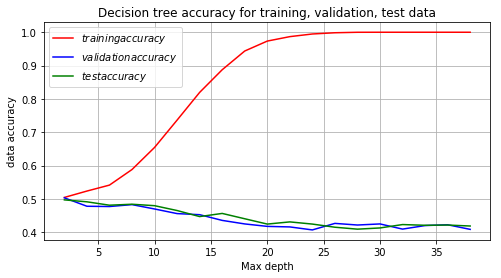

In [7]:
depth = range(2,40,2)
train_accuracy = []
valid_accuracy = []
test_accuracy = []
for d in depth:
    model_dt = DecisionTreeClassifier(max_depth = d)
    model_dt.fit(x_train, y_train)
    
    train_score = model_dt.score(x_train, y_train)
    train_accuracy.append(train_score)
    print('training accuracy (depth:',d,'):',train_score)
    
    valid_score = model_dt.score(x_valid, y_valid)
    valid_accuracy.append(valid_score)
    print('validation accuracy (depth:',d,'):',valid_score)
    
    test_score = model_dt.score(x_test, y_test)
    test_accuracy.append(test_score)
    print('test accuracy (depth:',d,'):',test_score)
    
plt.figure(figsize=(8,4))
plt.plot(depth,train_accuracy,label='$training accuracy$',color='red')
plt.plot(depth,valid_accuracy,label='$validation accuracy$',color='blue')
plt.plot(depth,test_accuracy,label='$test accuracy$',color='green')
plt.xlabel('Max depth')
plt.ylabel('data accuracy')
plt.title('Decision tree accuracy for training, validation, test data')
plt.legend()
plt.grid(True)
plt.show()

training accuracy (depth: 2 ): 0.5044199891755368
validation accuracy (depth: 2 ): 0.5032626427406199
test accuracy (depth: 2 ): 0.49709724238026126
training accuracy (depth: 4 ): 0.523001984484936
validation accuracy (depth: 4 ): 0.4796084828711256
test accuracy (depth: 4 ): 0.49129172714078373
training accuracy (depth: 6 ): 0.5378856215046004
validation accuracy (depth: 6 ): 0.4820554649265905
test accuracy (depth: 6 ): 0.4782293178519594
training accuracy (depth: 8 ): 0.5697275843406098
validation accuracy (depth: 8 ): 0.49184339314845027
test accuracy (depth: 8 ): 0.4862119013062409
training accuracy (depth: 10 ): 0.6065307595165073
validation accuracy (depth: 10 ): 0.47716150081566067
test accuracy (depth: 10 ): 0.4796806966618287
training accuracy (depth: 12 ): 0.6491069817788201
validation accuracy (depth: 12 ): 0.4641109298531811
test accuracy (depth: 12 ): 0.46008708272859217
training accuracy (depth: 14 ): 0.6930362619520115
validation accuracy (depth: 14 ): 0.467373572593800

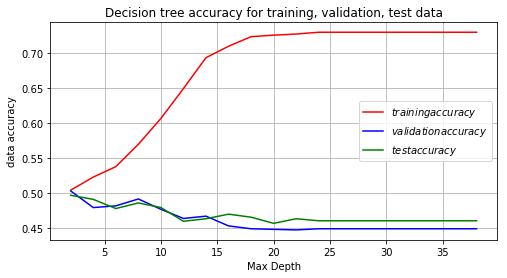

In [9]:
depth = range(2,40,2)
train_accuracy = []
valid_accuracy = []
test_accuracy = []
for d in depth:
    model_dt = DecisionTreeClassifier(max_depth = d, min_samples_split = 50, min_samples_leaf =10)
    model_dt.fit(x_train, y_train)
    
    train_score = model_dt.score(x_train, y_train)
    train_accuracy.append(train_score)
    print('training accuracy (depth:',d,'):',train_score)
    
    valid_score = model_dt.score(x_valid, y_valid)
    valid_accuracy.append(valid_score)
    print('validation accuracy (depth:',d,'):',valid_score)
    
    test_score = model_dt.score(x_test, y_test)
    test_accuracy.append(test_score)
    print('test accuracy (depth:',d,'):',test_score)
    
plt.figure(figsize=(8,4))
plt.plot(depth,train_accuracy,label='$training accuracy$',color='red')
plt.plot(depth,valid_accuracy,label='$validation accuracy$',color='blue')
plt.plot(depth,test_accuracy,label='$test accuracy$',color='green')
plt.xlabel('Max Depth')
plt.ylabel('data accuracy')
plt.title('Decision tree accuracy for training, validation, test data')
plt.legend()
plt.grid(True)
plt.show()